In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
235/235 [==============================] - 4s 15ms/step - loss: 0.6935 - accuracy: 0.0021 - val_loss: 0.6934 - val_accuracy: 0.0023
Epoch 2/5
235/235 [==============================] - 3s 13ms/step - loss: 0.6934 - accuracy: 0.0019 - val_loss: 0.6933 - val_accuracy: 0.0023
Epoch 3/5
235/235 [==============================] - 3s 13ms/step - loss: 0.6932 - accuracy: 0.0020 - val_loss: 0.6932 - val_accuracy: 0.0024
Epoch 4/5
235/235 [==============================] - 3s 14ms/step - loss: 0.6931 - accuracy: 0.0014 - val_loss: 0.6931 - val_accuracy: 0.0023
Epoch 5/5
235/235 [==============================] - 3s 14ms/step - loss: 0.6930 - accuracy: 0.0017 - val_loss: 0.6929 - val_accuracy: 0.0022


In [10]:
#Question 1: Add one more hidden layer to autoencoder

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# adding a hidden layer
HiddenLayer=Dense(512,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(HiddenLayer)
# this model maps an input to its reconstruction
autoencoder1 = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder1.compile(optimizer='adadelta', loss='binary_crossentropy',)
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder1.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 7s 30ms/step - loss: 0.6940 - val_loss: 0.6938
Epoch 2/5
235/235 [==============================] - 7s 30ms/step - loss: 0.6938 - val_loss: 0.6936
Epoch 3/5
235/235 [==============================] - 7s 30ms/step - loss: 0.6936 - val_loss: 0.6934
Epoch 4/5
235/235 [==============================] - 7s 29ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 5/5
235/235 [==============================] - 7s 29ms/step - loss: 0.6932 - val_loss: 0.6931


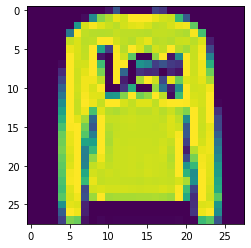

In [24]:
#Question 2: Do the prediction on the test data and then visualize one of the reconstructed version of that test data. Also, visualize the same test data before reconstruction using Matplotlib

# prediction
prediction = autoencoder1.predict(x_test[[6],:])

from matplotlib import pyplot as plt
# Input Image
plt.imshow(x_test[1].reshape(28,28))
plt.show()

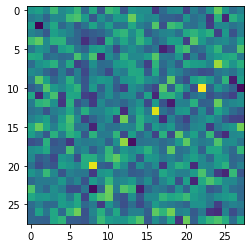

In [25]:
# Reconstructed Image
plt.imshow(prediction[0].reshape(28,28))
plt.show()

In [26]:
#Question 3: Repeat the question 2 on the denoisening autoencoder

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
235/235 [==============================] - 3s 14ms/step - loss: 0.6928 - accuracy: 0.0016 - val_loss: 0.6928 - val_accuracy: 0.0021
Epoch 2/10
235/235 [==============================] - 3s 14ms/step - loss: 0.6926 - accuracy: 0.0016 - val_loss: 0.6926 - val_accuracy: 0.0021
Epoch 3/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6925 - accuracy: 0.0016 - val_loss: 0.6925 - val_accuracy: 0.0021
Epoch 4/10
235/235 [==============================] - 3s 14ms/step - loss: 0.6923 - accuracy: 0.0016 - val_loss: 0.6923 - val_accuracy: 0.0021
Epoch 5/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6922 - accuracy: 0.0017 - val_loss: 0.6921 - val_accuracy: 0.0022
Epoch 6/10
235/235 [==============================] - 3s 14ms/step - loss: 0.6920 - accuracy: 0.0017 - val_loss: 0.6920 - val_accuracy: 0.0022
Epoch 7/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6919 - accuracy: 0.0017 - val_loss: 0.6918 - val_accuracy: 0.0022

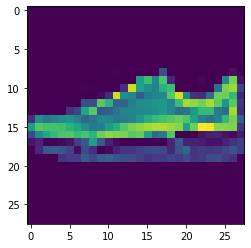

In [29]:
# prediction
prediction1 = autoencoder.predict(x_test_noisy[[15],:])

# Input Image
plt.imshow(x_test[9].reshape(28,28))
plt.show()

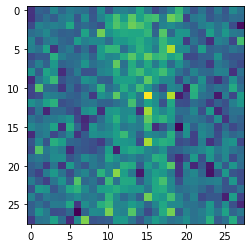

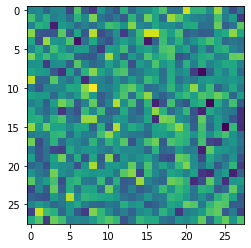

In [30]:
# After applying noise to data
plt.imshow(x_test_noisy[15].reshape(28,28))
plt.show()

# Reconstructed Image
plt.imshow(prediction1[0].reshape(28,28))
plt.show()

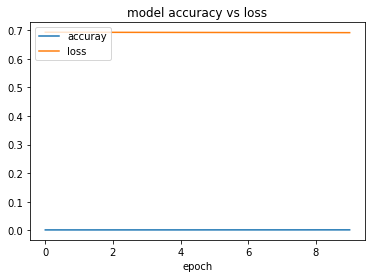

In [31]:
#Question 4: Plot loss and accuracy using the history object

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.legend(['accuray','loss'], loc='upper left')
plt.show()

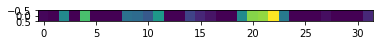

In [32]:
#Bonus Question: Visualize the compressed version of the input data in the middle layer

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
encoder = Model(input_img, encoded)
encoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

encoded_imgs = encoder.predict(x_test[[2],:])

plt.imshow(encoded_imgs)
plt.show()